In [1]:
!nvidia-smi

Wed Nov  5 04:48:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install roboflow



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 103.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="2T80wqCJ4jtcYzmH7wkF")
project = rf.workspace("happy-ndtke").project("urpc-nzxfa-mmqfo")
version = project.version(1)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to URPC-1 in yolov12:: 100%|██████████| 4073/4073 [00:00<00:00, 8024.20it/s]


In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.5 MB/s eta 0:00:00


In [7]:
import yaml, os

def create_data_yaml(dataset_path, path_to_data_yaml):

    labels_path = os.path.join(dataset_path, 'train', 'labels')
    label_files = [f for f in os.listdir(labels_path) if f.endswith('.txt')]


    all_ids = set()
    for label_file in label_files:
        with open(os.path.join(labels_path, label_file), 'r') as f:
            for line in f:
                if len(line.strip()) > 0:
                    class_id = int(line.strip().split()[0])
                    all_ids.add(class_id)

    # Create class names (0,1,2,...)
    classes = [f'class_{i}' for i in sorted(all_ids)]
    number_of_classes = len(classes)

    data = {
        'path': dataset_path,
        'train': 'train/images',
        'val': 'valid/images',
        'nc': number_of_classes,
        'names': classes
    }


    with open(path_to_data_yaml, 'w') as f:
        yaml.dump(data, f, sort_keys=False)
    print(f'Created {path_to_data_yaml}')


dataset_path = '/content/URPC-1'
path_to_data_yaml = '/content/URPC-1/data.yaml'

create_data_yaml(dataset_path, path_to_data_yaml)


!cat /content/URPC-1/data.yaml


Created /content/URPC-1/data.yaml
path: /content/URPC-1
train: train/images
val: valid/images
nc: 4
names:
- class_1
- class_2
- class_3
- class_4


In [8]:
!yolo detect train data=/content/URPC-1/data.yaml model=yolo12s.pt epochs=60 imgsz=640


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/URPC-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=Fals

In [9]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=/content/URPC-1/valid/images save=True


Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,232,428 parameters, 0 gradients, 21.2 GFLOPs

image 1/609 /content/URPC-1/valid/images/2019v100010_jpg.rf.6f1410838fb60c3d1f3062120cbed6d4.jpg: 384x640 3 class_2s, 57.4ms
image 2/609 /content/URPC-1/valid/images/2019v100025_jpg.rf.1ef2c4ff081ca5064582a98b2c3e9fa6.jpg: 384x640 (no detections), 13.6ms
image 3/609 /content/URPC-1/valid/images/2019v100027_jpg.rf.993e8ae84935259a37a80572e48b15a2.jpg: 384x640 1 class_2, 13.6ms
image 4/609 /content/URPC-1/valid/images/2019v100029_jpg.rf.031f7a2d4005f74c39c62d44dc0d1b18.jpg: 384x640 2 class_2s, 1 class_3, 13.6ms
image 5/609 /content/URPC-1/valid/images/2019v100049_jpg.rf.685ea533e863e11508e699bfeebc015d.jpg: 384x640 (no detections), 13.6ms
image 6/609 /content/URPC-1/valid/images/2019v100074_jpg.rf.2fcf377780a946e829a6d78ec4415f49.jpg: 384x640 2 class_2s, 13.6ms
image 7/609 /content/URPC-1/valid/images/2019v100089_jpg.rf.7

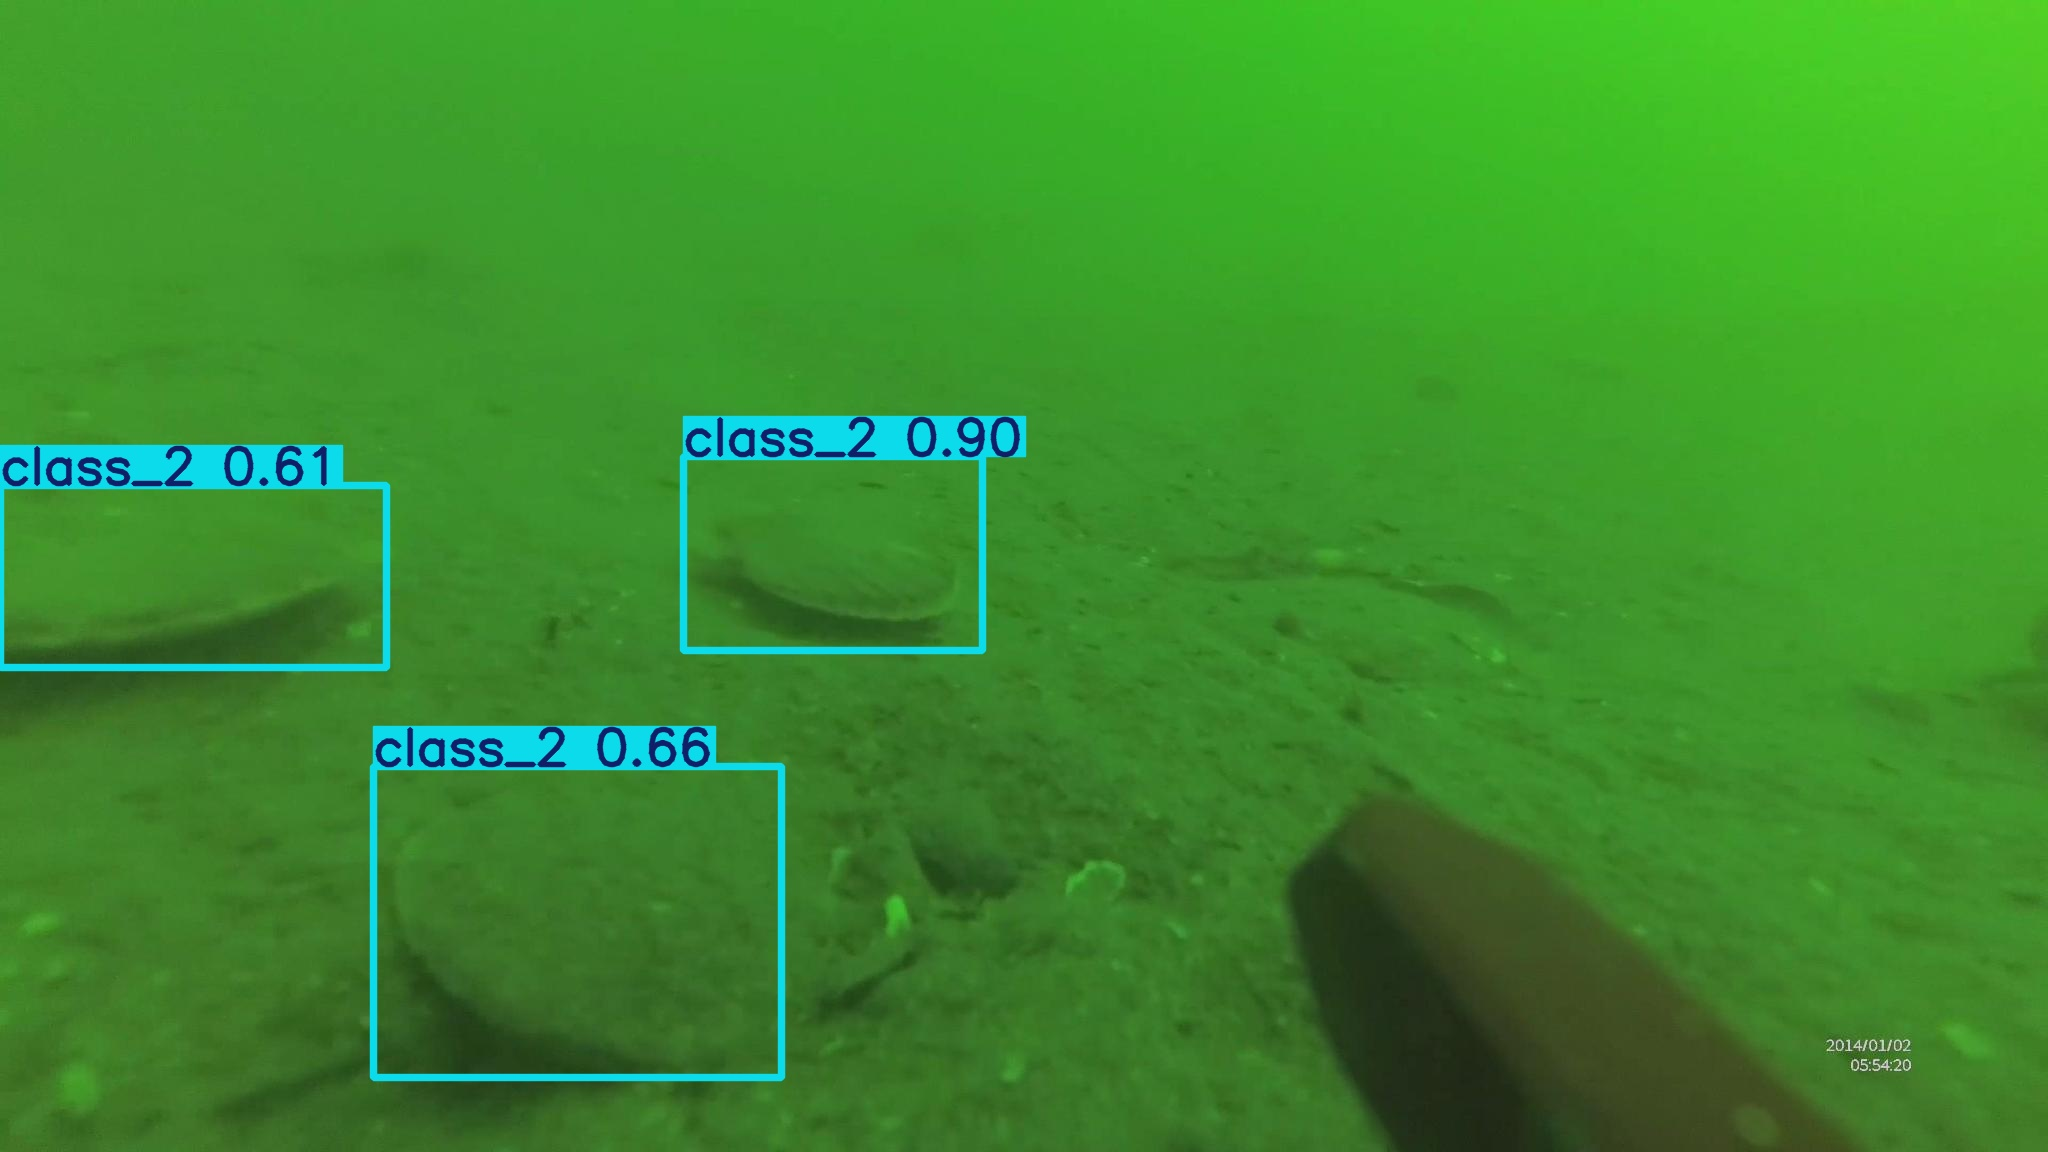

Displayed: /content/runs/detect/predict/2019v100010_jpg.rf.6f1410838fb60c3d1f3062120cbed6d4.jpg



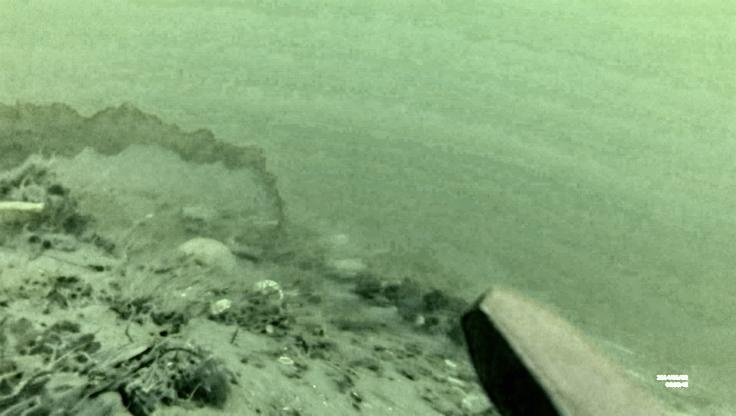

Displayed: /content/runs/detect/predict/2019v100025_jpg.rf.1ef2c4ff081ca5064582a98b2c3e9fa6.jpg



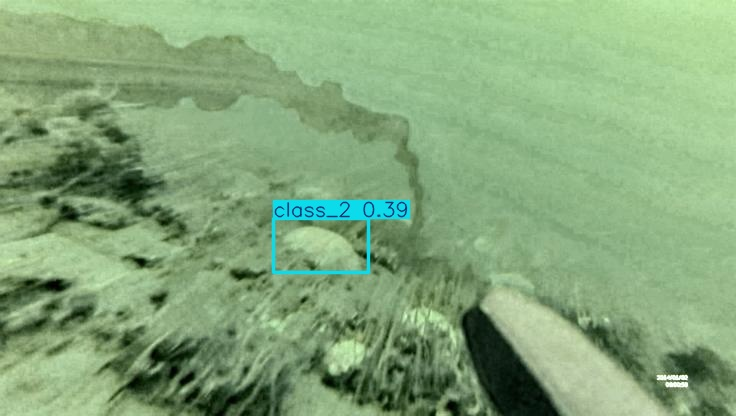

Displayed: /content/runs/detect/predict/2019v100027_jpg.rf.993e8ae84935259a37a80572e48b15a2.jpg



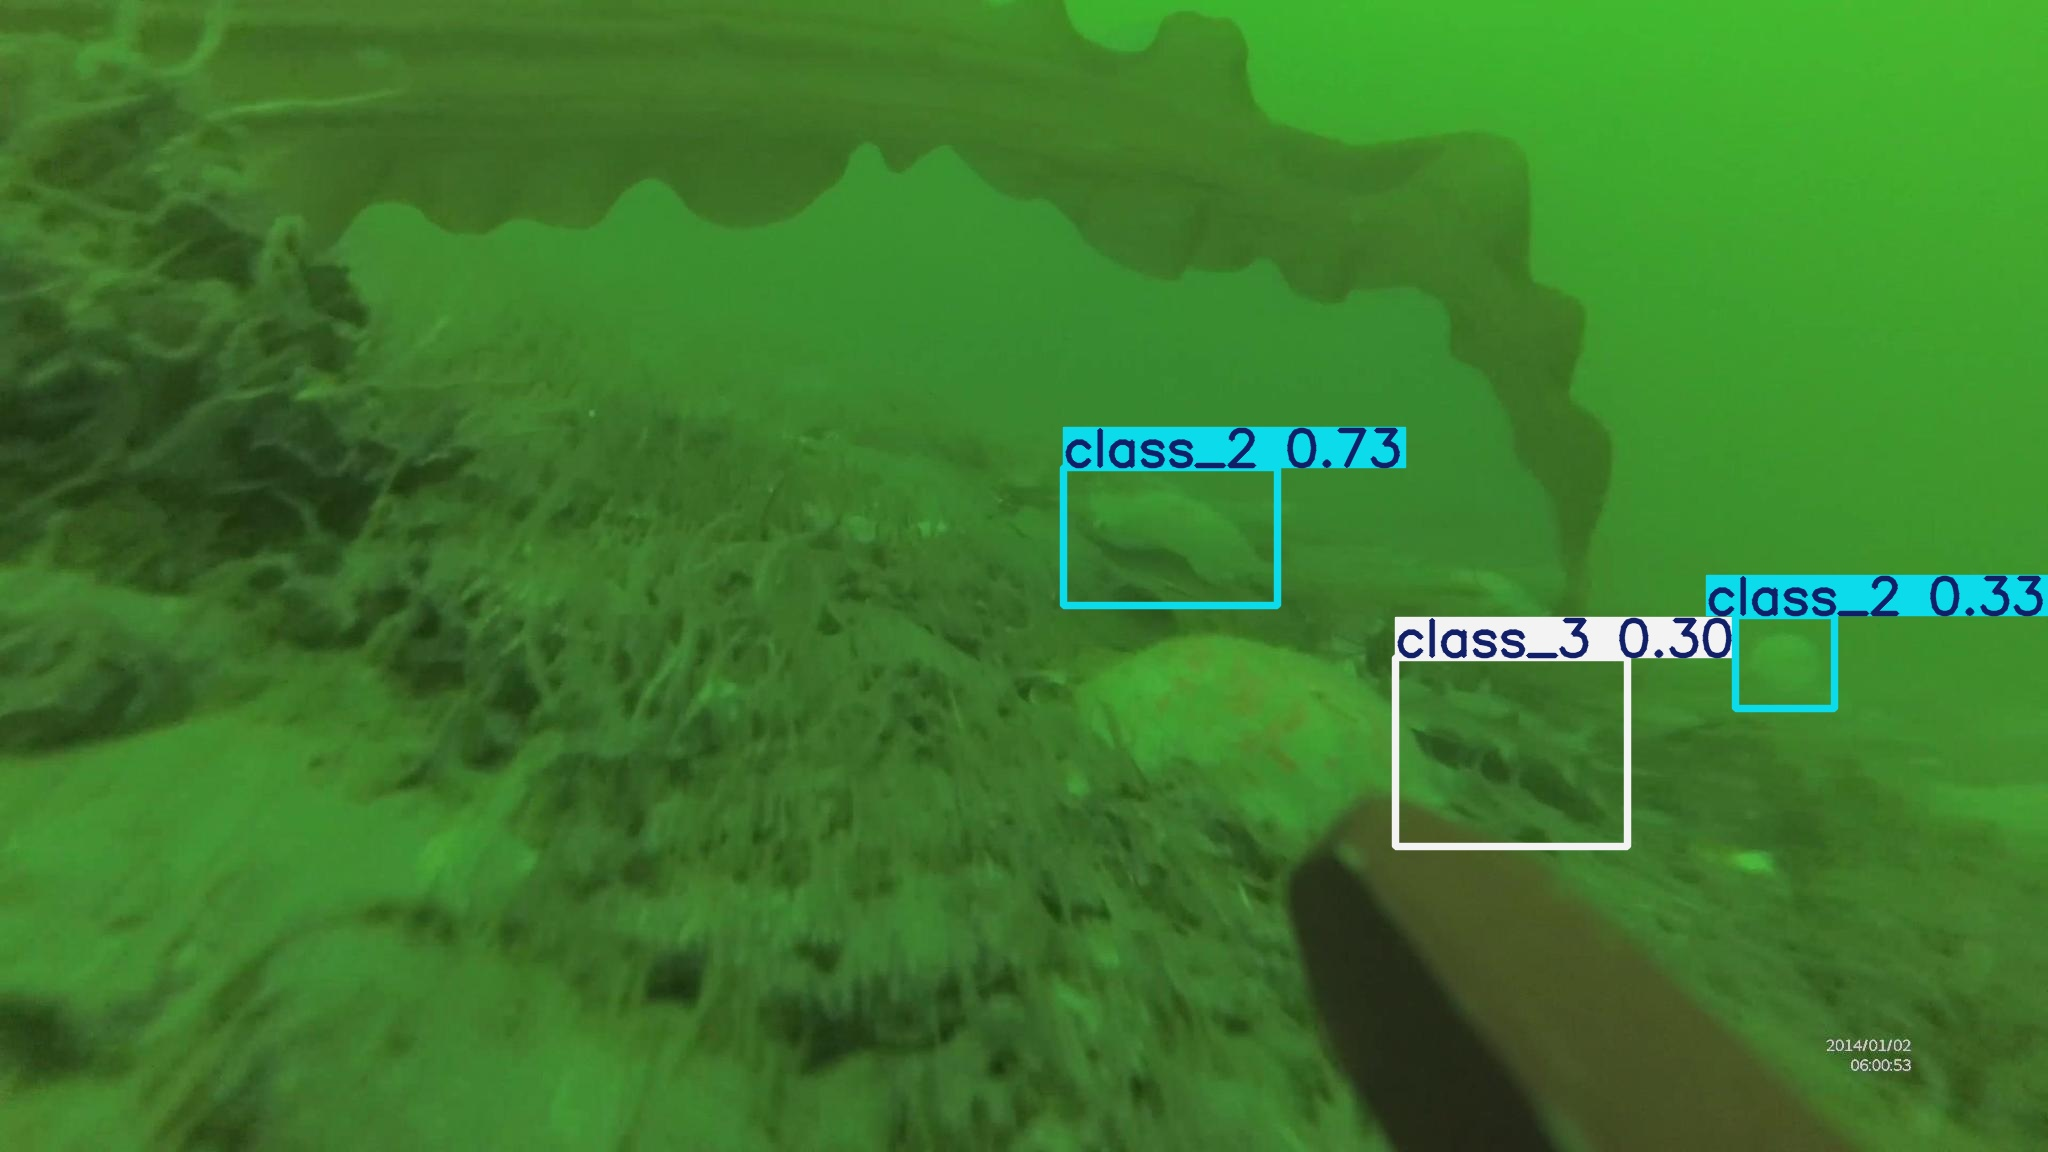

Displayed: /content/runs/detect/predict/2019v100029_jpg.rf.031f7a2d4005f74c39c62d44dc0d1b18.jpg



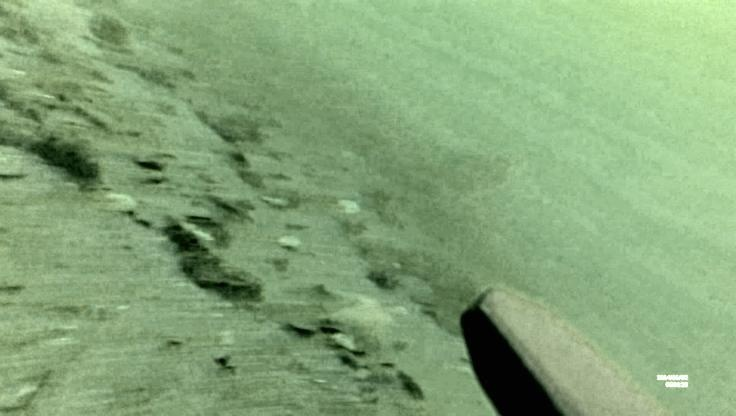

Displayed: /content/runs/detect/predict/2019v100049_jpg.rf.685ea533e863e11508e699bfeebc015d.jpg



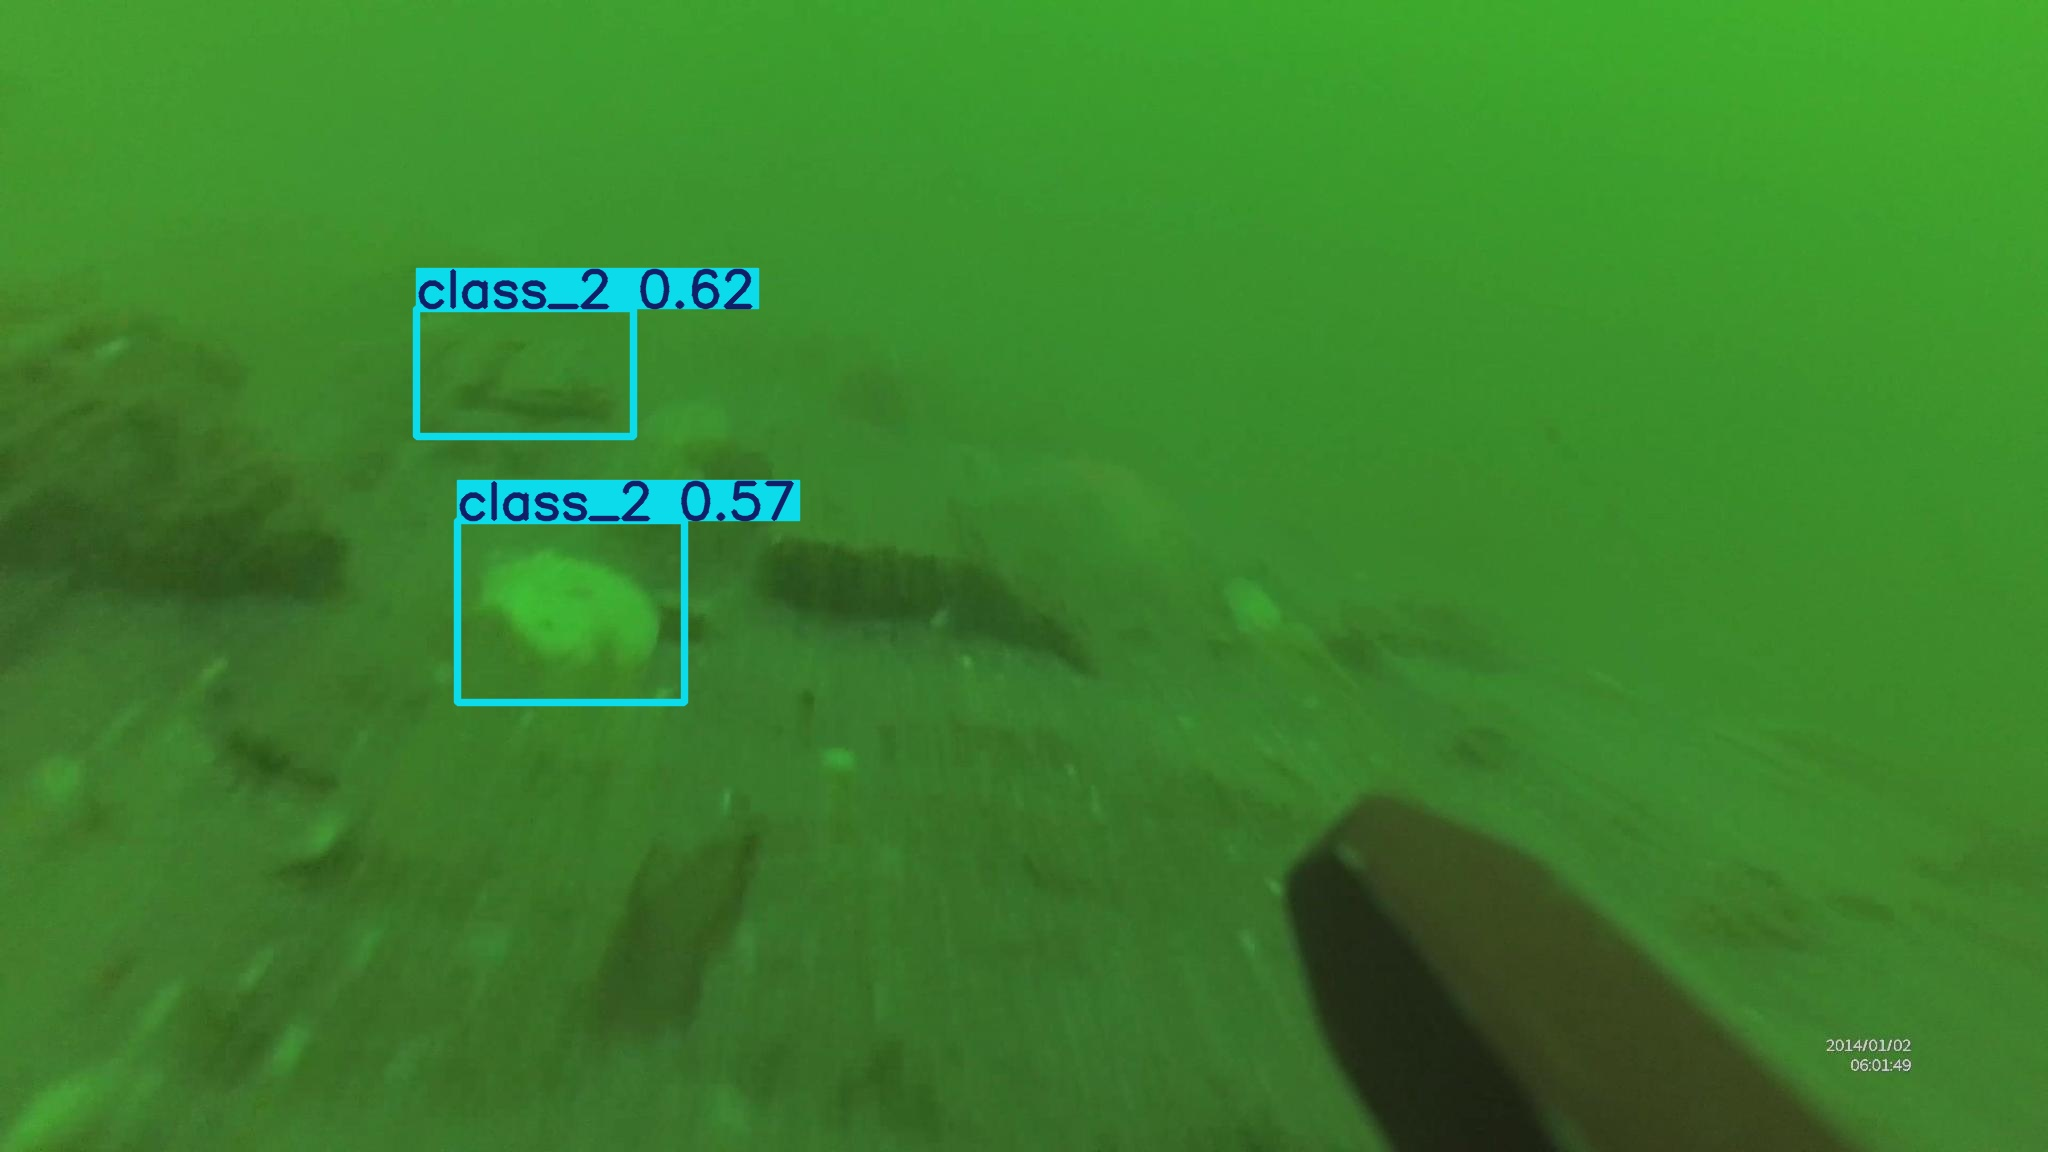

Displayed: /content/runs/detect/predict/2019v100074_jpg.rf.2fcf377780a946e829a6d78ec4415f49.jpg



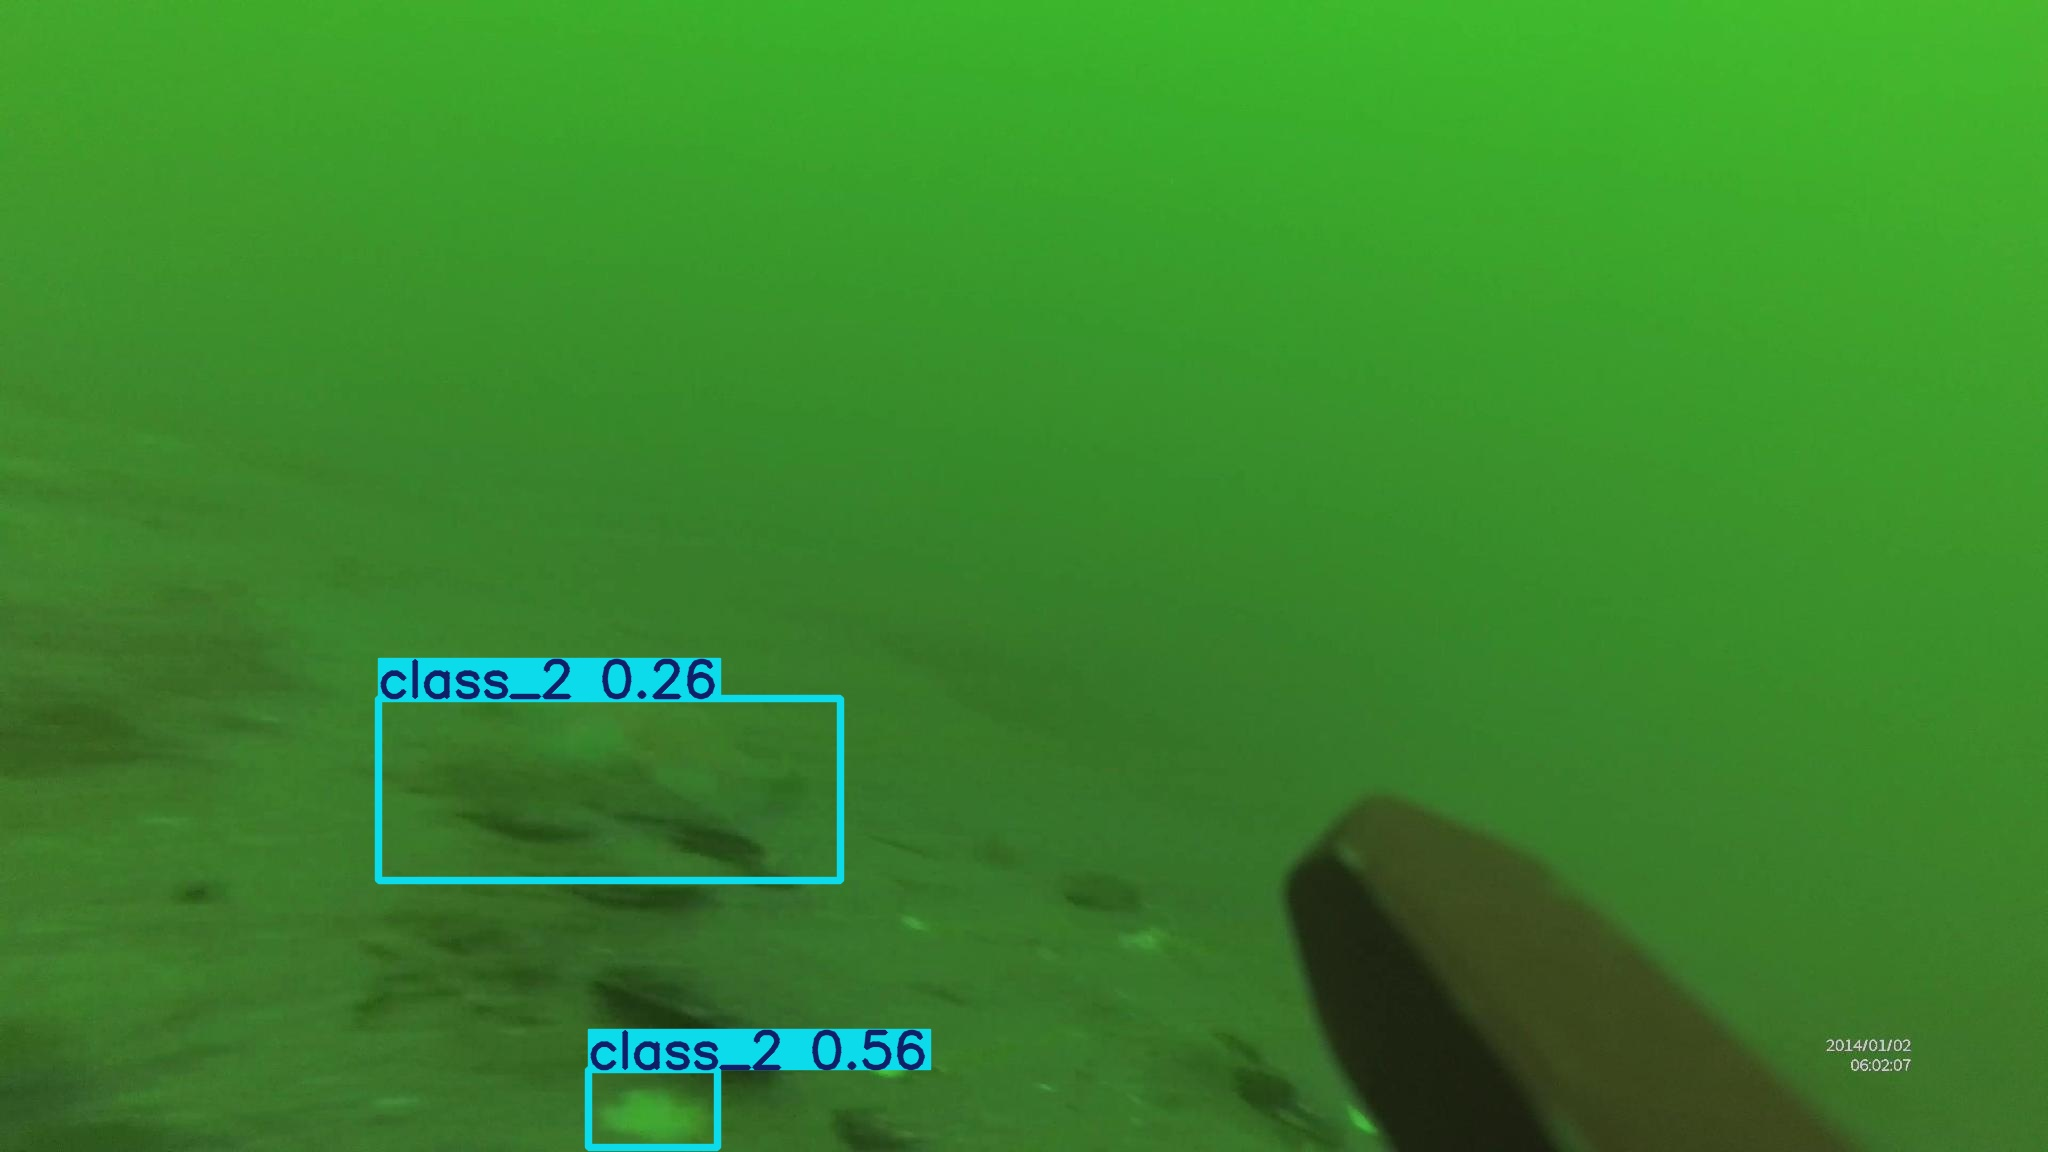

Displayed: /content/runs/detect/predict/2019v100089_jpg.rf.72997065ca918220e11ebf9b893d92af.jpg



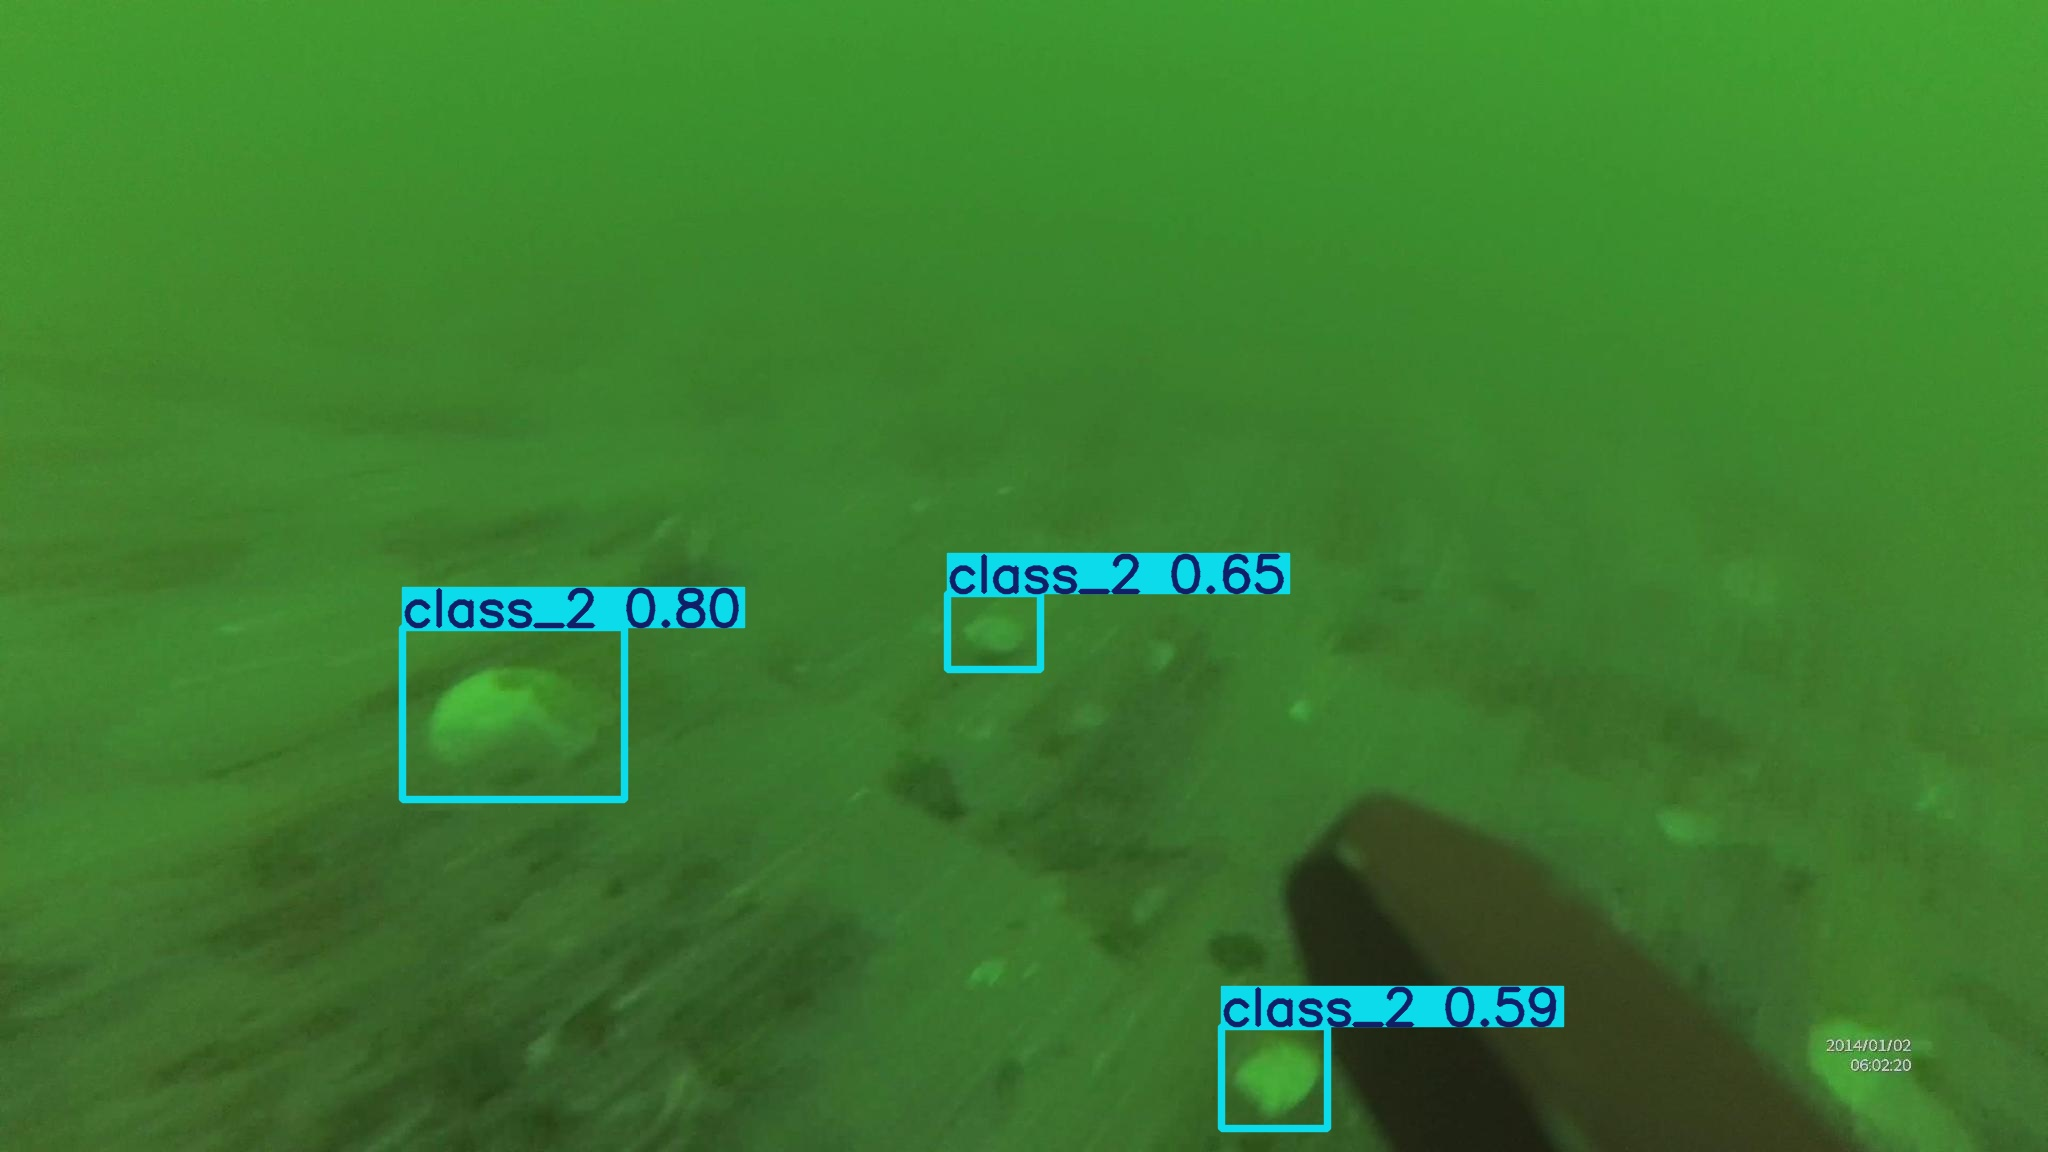

Displayed: /content/runs/detect/predict/2019v100100_jpg.rf.324df56c13c5238804caced52c86d1a1.jpg



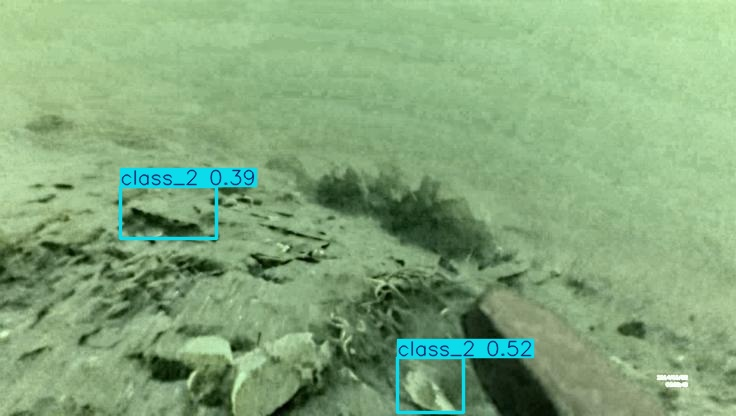

Displayed: /content/runs/detect/predict/2019v100126_jpg.rf.78de63d50fbd7566439a0a3abf7c6fe1.jpg



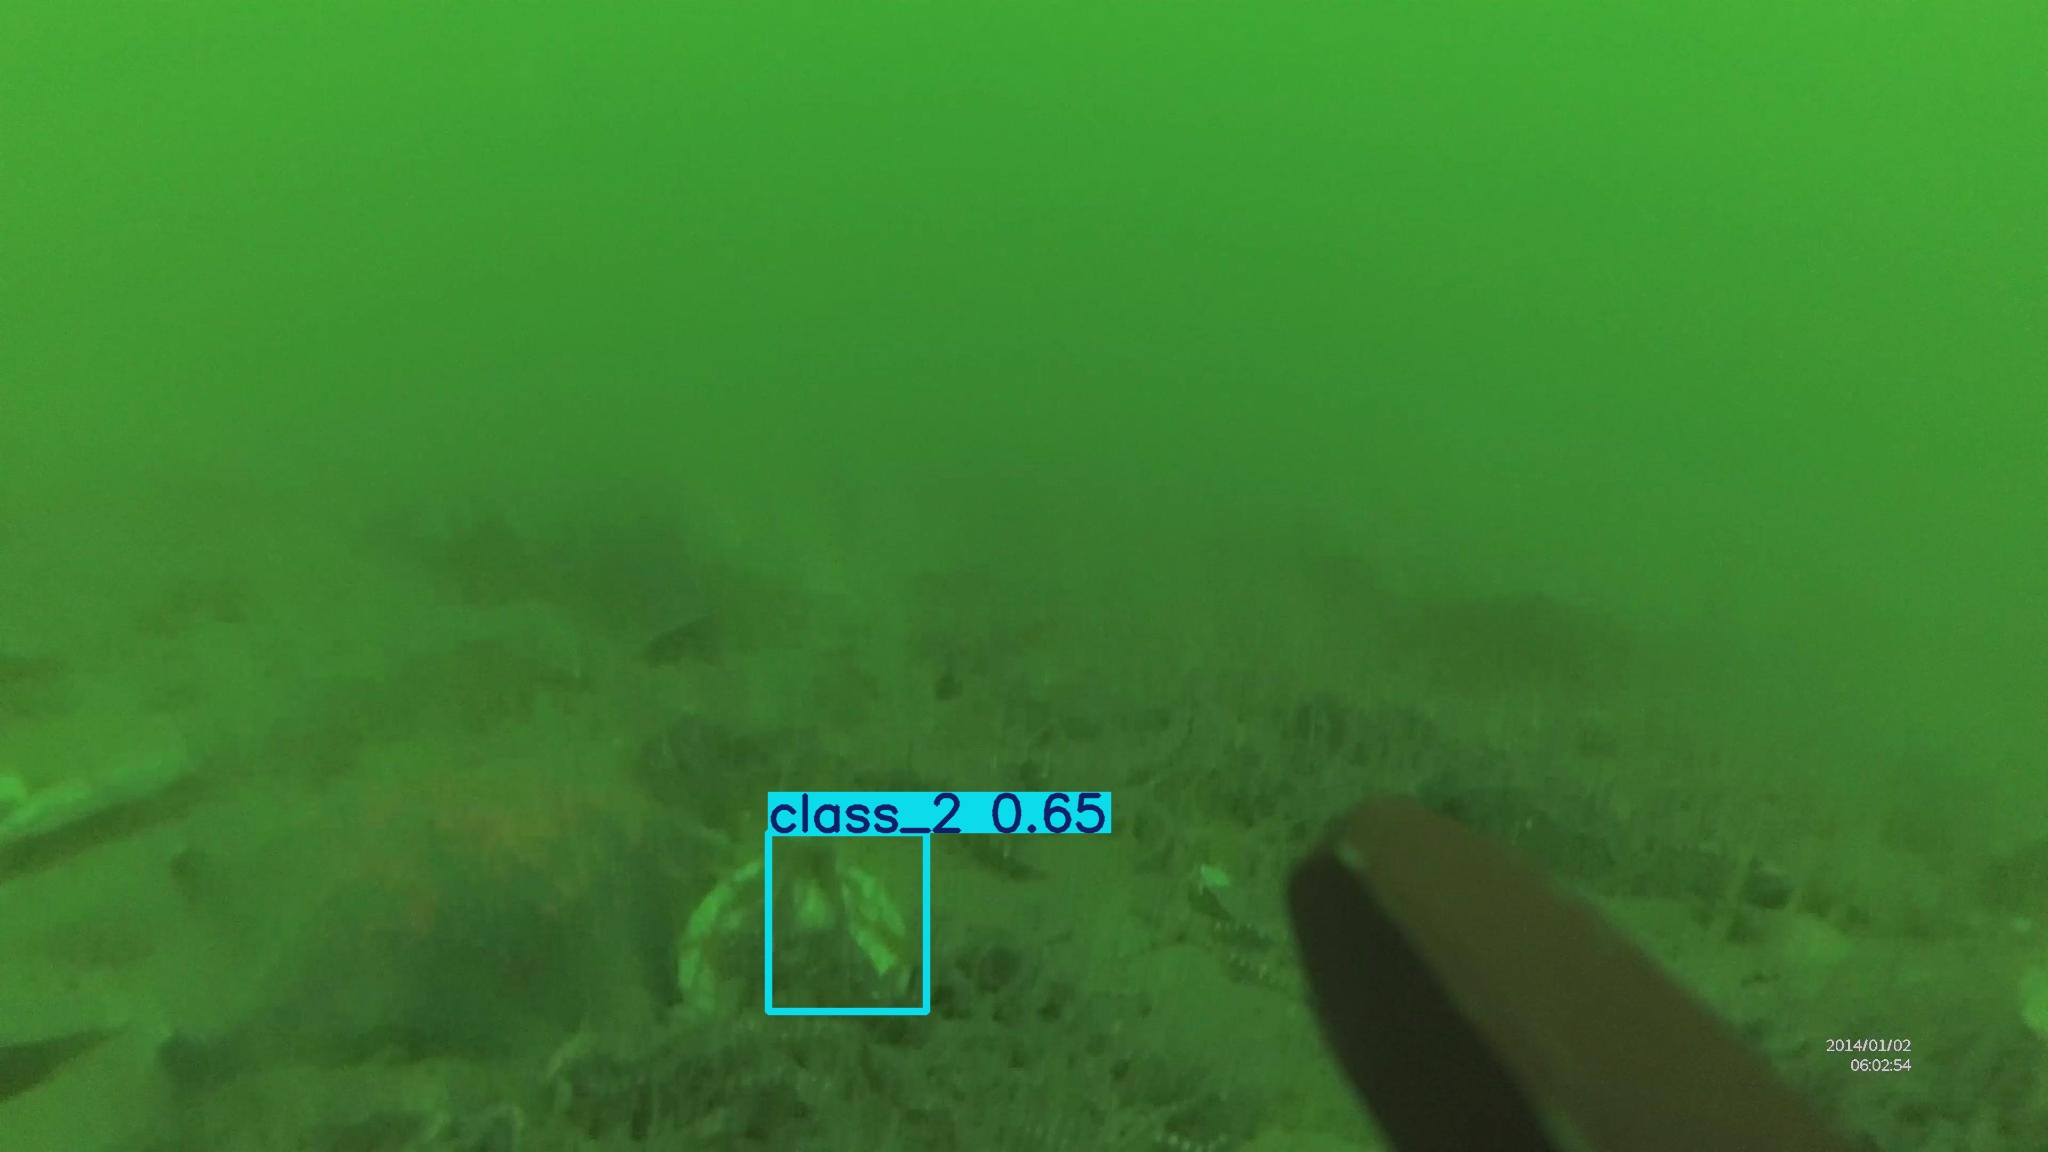

Displayed: /content/runs/detect/predict/2019v100131_jpg.rf.be3e1702922686b3b7431dd12421e7dc.jpg



In [11]:

import glob
from IPython.display import Image, display


prediction_path = '/content/runs/detect/predict/'

# Get the first 10 .jpg images and display them
for image_path in sorted(glob.glob(f'{prediction_path}*.jpg'))[:10]:
    display(Image(filename=image_path, height=400))
    print(f"Displayed: {image_path}\n")
